## TsAI
### 여러가지 형태의 AI모델들을 미리 정의해놓아 구현할 필요가 없이 사용 가능하게 지정한 모듈

#### https://github.com/timeseriesAI/tsai
#### https://timeseriesai.github.io/tsai/tutorials.html

In [ ]:
!pip install tsai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.9/298.9 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 85.3 MB/s eta 0:00:00


In [ ]:
!pip install sktime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 62.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.2/118.2 kB 16.7 MB/s eta 0:00:00


In [ ]:
from tsai.all import *

In [ ]:
dataset = 'AppliancesEnergy'
X, y, splits = get_regression_data(dataset, split_data=False)

119it [00:05, 21.35it/s]
66it [00:01, 41.55it/s]


In [ ]:
X.shape

(137, 24, 144)

### batchsize ,window size, feature size

In [ ]:
y.shape

(137,)

## X,Y를 통해 다중입력 및 단일출력 dATA인것을 확인가능

In [ ]:
y = np.random.randint(1, 100, size=(137, 2))

In [ ]:
y.shape

(137, 2)

## Memory map
### 시계열 데이터포인트가 엄청 많다
#### 따라서 전체가 아닌 필요한 부분만 엑세스하도록 memmap 형태로 사용해줘야한다.


In [ ]:
type(X)

numpy.memmap

X      - shape: [137 samples x 24 features x 144 timesteps]  type: memmap  dtype:float64  isnan: 0
y      - shape: (137, 2)  type: ndarray  dtype:int64  isnan: 0
splits - n_splits: 2 shape: [95, 42]  overlap: False


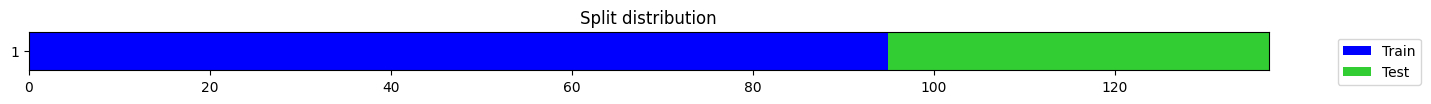

In [ ]:
check_data(X, y, splits)

In [ ]:
## Batch 샘플러
tfms  = [None, [TSRegression()]]

## pytorch용 데이터로더를 찾는것
dls = get_ts_dls(X, y, splits=splits, tfms=tfms, bs=64)

In [ ]:
dls

In [ ]:
dls.one_batch()

(TSTensor(samples:64, vars:24, len:144, device=cuda:0, dtype=torch.float32),
 tensor([[61., 32.],
         [50., 90.],
         [36., 59.],
         [41., 63.],
         [50., 33.],
         [86., 78.],
         [52., 30.],
         [38., 21.],
         [84., 99.],
         [29., 93.],
         [13., 75.],
         [41., 97.],
         [ 3., 35.],
         [86., 44.],
         [33., 66.],
         [38., 31.],
         [20., 88.],
         [72., 15.],
         [48., 39.],
         [81., 69.],
         [17., 74.],
         [61., 28.],
         [34., 50.],
         [52., 71.],
         [25., 73.],
         [57., 43.],
         [65., 79.],
         [17., 44.],
         [37., 51.],
         [98., 52.],
         [27., 62.],
         [40., 64.],
         [22., 74.],
         [34., 69.],
         [ 3.,  4.],
         [23., 19.],
         [67., 16.],
         [68., 90.],
         [61., 93.],
         [43., 90.],
         [95., 14.],
         [75., 23.],
         [39., 38.],
         [85., 27.],

In [ ]:
y = np.random.randint(1, 100, size=(137, 2))

## Batch에 따라서 평균등 배치값을 볼수 있음
### 왜곡이나 분포 확인

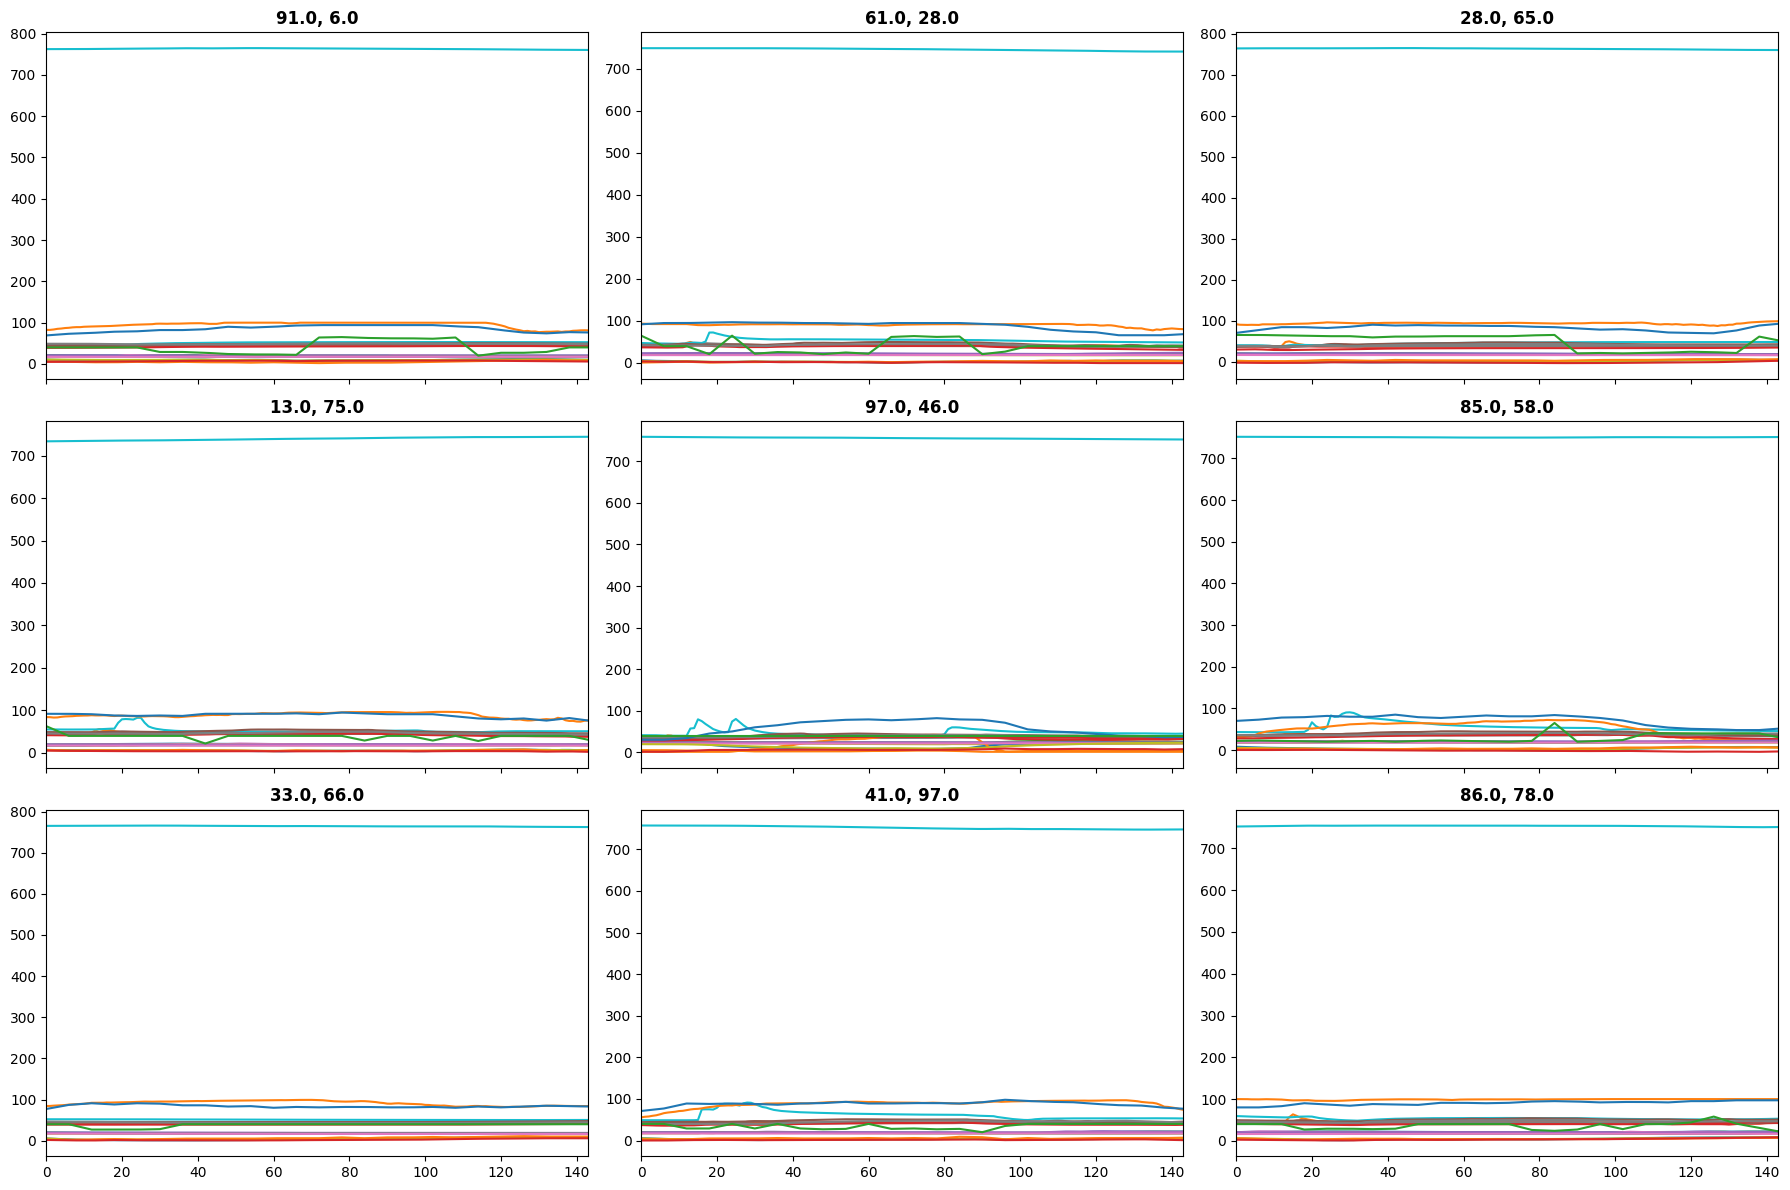

In [ ]:
dls.show_batch()

## 다중 출력을 다루지 않고 단일 출력을 다루기 때문에 TST 모델 사용
### 다중출력에서는 TSTPlus 사용
#### 본 노트는 다중출력으로 코드 바뀌어있음
## Tsai에서 다중출력모델은 Plus model

SuggestedLRs(valley=0.0003311311302240938)

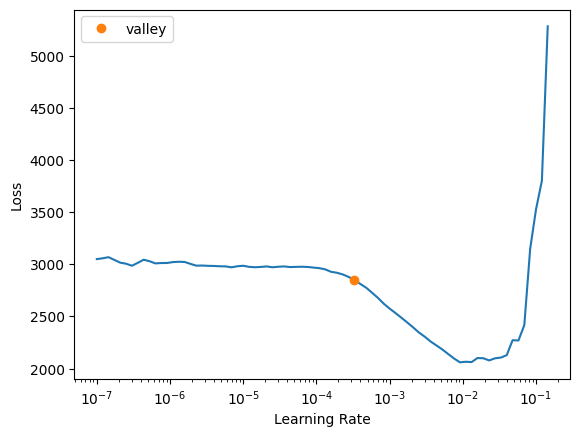

In [ ]:
learn = ts_learner(dls, TSTPlus, metrics=[mae, rmse], cbs=ShowGraph())
learn.lr_find()
### 추천 valley => 추천 학습률
### 최적의 속도와 방식에 관한 학습률 제공

In [ ]:
learn.loss_func

FlattenedLoss of MSELoss()

### 보이지 않는 데이터에 대한 모델의 예측을 알아낼때
#### fit_one_cycle

epoch,train_loss,valid_loss,mae,_rmse,time
0,2906.372314,4952.718750,60.771706,70.375557,00:00
1,2953.697021,3927.833252,53.915451,62.672428,00:00
2,2955.530273,3121.160645,47.100132,55.867348,00:00
3,2944.728027,2595.974121,42.916439,50.950703,00:00
4,2913.066406,2258.542236,40.011826,47.524120,00:00
5,2861.458496,2110.408691,38.657322,45.939182,00:00
6,2801.510742,2038.843994,37.939598,45.153561,00:00
7,2739.176514,2008.947876,37.584988,44.821289,00:00
8,2718.798828,2027.562500,37.612400,45.028461,00:00
9,2682.092285,2085.478516,37.961388,45.667038,00:00


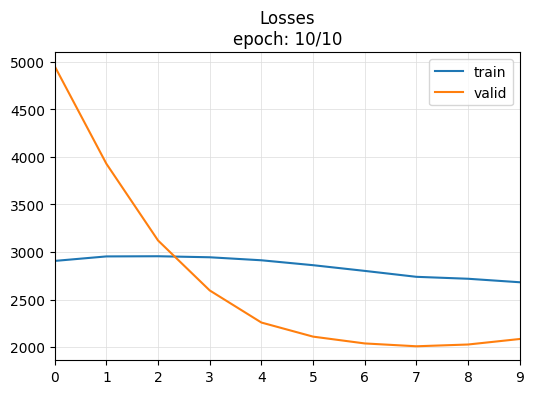

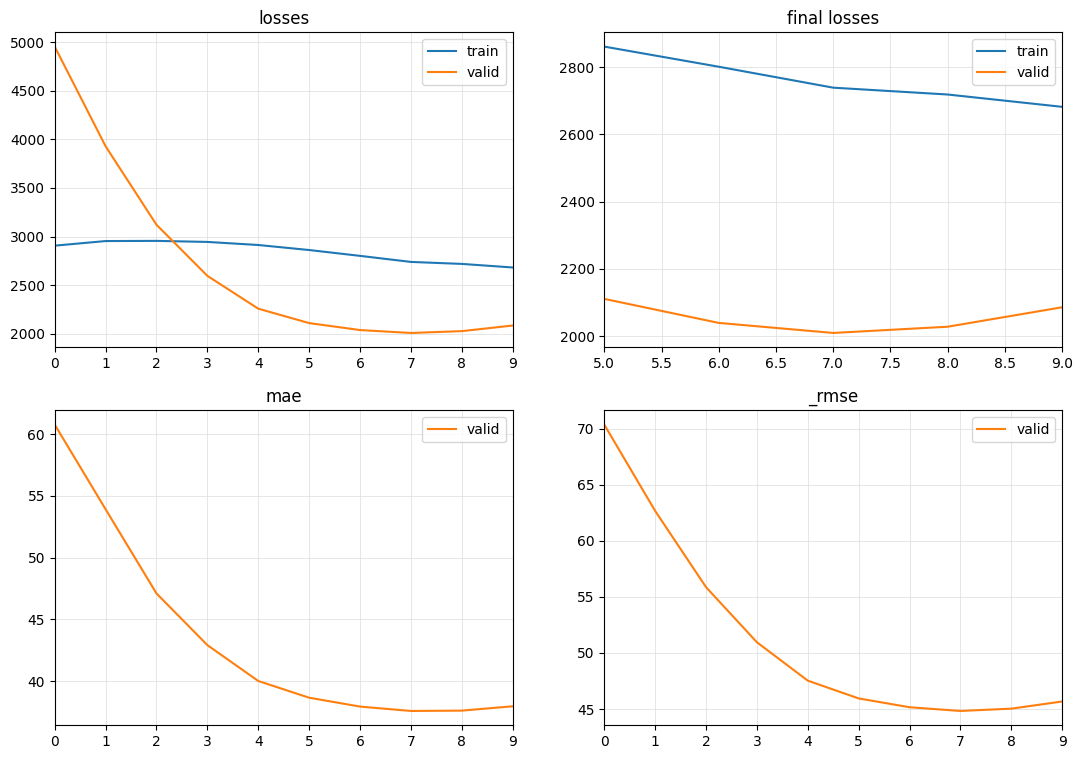

In [ ]:
learn = ts_learner(dls, TSTPlus, metrics=[mae, rmse], cbs=ShowGraph())
learn.fit_one_cycle(10,0.0003311311302240938)

In [ ]:
learn.export("/model")

In [ ]:
learn.predict

<bound method Learner.predict of <fastai.learner.Learner object at 0x7fd7e282f8b0>>